In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
from cv2 import imread
import torch
import pandas as pd

%matplotlib inline

# Logistic Regression

In [3]:
def sigmoid(value):
 return 1/(1+np.exp(-value))

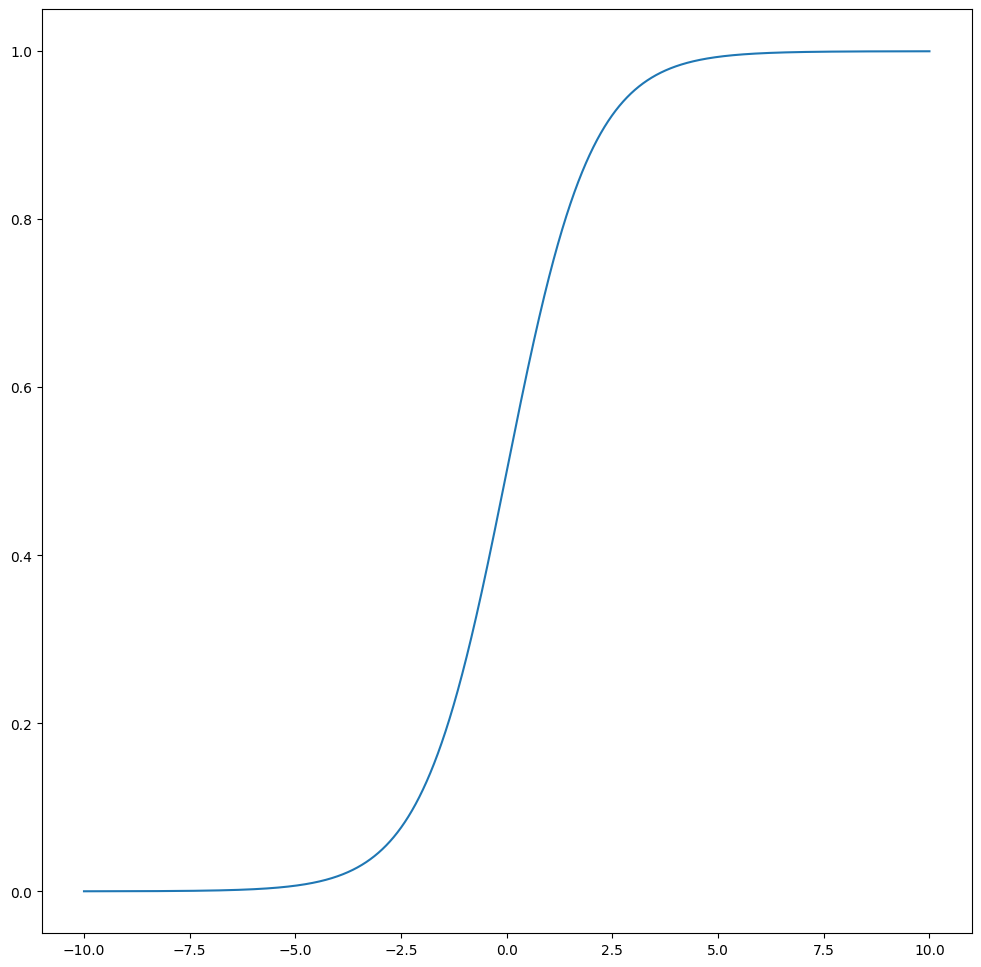

In [6]:
x_array = np.linspace(-10,10,10000)
y_array = sigmoid(value=x_array)

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,12))
ax.plot(x_array, y_array)

In [38]:
def dataframe_to_array(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1.iloc[:,0].to_numpy()
    targets_array = dataframe1['male'].to_numpy()
    return inputs_array, targets_array
   

dataframe = pd.read_csv(os.path.join('/Users/Giuseppe/Documents/vscode/exam/boneageassessment/dataset', 'train.csv'))
input_array, targets_array = dataframe_to_array(dataframe)
print(input_array)

[ 1377  1378  1379 ... 15608 15609 15610]


In [26]:
"""Logistic Regression

 Returns:
     _type_: _description_
"""

class LogisticRegression():
 """_summary_
 """
 def __init__(self, lr=0.001, n_inters=1000):
  self.lr = lr
  self.n_inters = n_inters
  self.bias = None
  self.weight = None
 
 def fit(self, X, y_values):
  n_samples, n_features = X.shape
  self.weights = np.zeros(n_features)
  self.bias = 0
  
  for i in range(self.n_inters):
   linear_predictions = np.dot(X, self.weights)+self.bias
   predictions = sigmoid(linear_predictions)
   
   dw = (1 / n_samples) * np.dot(X.T, (predictions - y_values))
   db = (1 / n_samples) * np.sum(predictions - y_values)
   
   self.weights = self.weights - self.lr * dw
   self.bias = self.bias - self.lr * db
 
 def predict(self, X):
  linear_predictions = np.dot(X, self.weights)+self.bias
  y_predictions = sigmoid(linear_predictions)
  class_predictions = [0 if y <= 0.5 else 1 for y in y_predictions]
  return class_predictions
  

In [27]:
#training

from sklearn.model_selection import train_test_split
from sklearn import datasets

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

clf = LogisticRegression() #cls means classifier
clf.fit(X_train, y_train)
y_predictions = clf.predict(X_test)

def accuracy(y_pred, y_test):
 return np.sum(y_pred == y_test)/len(y_test)

acc = accuracy(y_predictions, y_test)

def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

/var/folders/24/6fcf3qvd6hjcr6_j7t14hnnr0000gq/T/ipykernel_89261/70332375.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-value))


# CNN Regression

In [46]:
#prepare dataset

DATAFRAME = pd.read_csv(os.path.join('/Users/Giuseppe/Documents/vscode/exam/boneageassessment/dataset', 'train.csv')) 

images_id = np.array(DATAFRAME['id'].values)
gender = np.array(DATAFRAME['male'].values)

print(images_id)

[ 1377  1378  1379 ... 15608 15609 15610]


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

# Set up data directories
train_data_dir = '/Users/Giuseppe/Documents/vscode/exam/dataset/boneage-training-dataset/resized/'
validation_data_dir = '/Users/Giuseppe/Documents/vscode/exam/dataset/boneage-validation-dataset/boneage-validation-dataset/resized/'
test_data_dir = '/Users/Giuseppe/Documents/vscode/exam/dataset/boneage-test-dataset/resized/'

# Image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

In [77]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

model = Sequential(name='gender_cnn')

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [76]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 128)     

In [74]:
model.compile(loss = "binary_crossentropy", optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
epochs = 20
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

# Evaluate the model
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

evaluation = model.evaluate(test_generator)
print("Test Accuracy:", evaluation[1])